In [5]:
import pandas as pd
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
                  25,21,18,24,26,33,26,27,28,19,25])
#eski sistem

In [6]:
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
                  32,33,33,33,31,32,33,26,32,33,29])
#yeni sistem

In [7]:
#veri her zaman yukarıdaki gibi verilmeyebilir bazen de excelden çekerken
#iki sütunda olabilir bunları tek tek sütun ve gruplarına ayırmak gerekir

In [8]:
A_B = pd.concat([A,B],axis = 1)

In [9]:
A_B.columns = ["A","B"]

In [10]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [11]:
import numpy as np
array = []
for i in A_B["A"]:
    array.append([i,"A"])
array

[[30, 'A'],
 [27, 'A'],
 [21, 'A'],
 [27, 'A'],
 [29, 'A'],
 [30, 'A'],
 [20, 'A'],
 [20, 'A'],
 [27, 'A'],
 [32, 'A'],
 [35, 'A'],
 [22, 'A'],
 [24, 'A'],
 [23, 'A'],
 [25, 'A'],
 [27, 'A'],
 [23, 'A'],
 [27, 'A'],
 [23, 'A'],
 [25, 'A'],
 [21, 'A'],
 [18, 'A'],
 [24, 'A'],
 [26, 'A'],
 [33, 'A'],
 [26, 'A'],
 [27, 'A'],
 [28, 'A'],
 [19, 'A'],
 [25, 'A']]

In [12]:
A = pd.DataFrame(array)

In [13]:
array = []
for i in A_B["B"]:
    array.append([i,"B"])
B = pd.DataFrame(array)

In [14]:
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


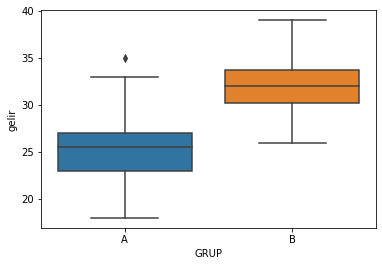

In [15]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir",data = AB);

In [14]:
#VARSAYIM KONTROLÜ
from scipy.stats import shapiro
shapiro(A_B.A)
#shapiroda birleştirdiğimiz veri setinden de gelirleri alarak normallik testi
#yapılabilir fakat tek tek normallik kontrolü yapmak daha doğrudur.

(0.9789242148399353, 0.7962799668312073)

In [15]:
shapiro(A_B.B)

(0.9561260342597961, 0.24584221839904785)

In [16]:
#varyans homojenliği varsayımı
import scipy.stats as stats
stats.levene(A_B.A,A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [17]:
#p-value 0.05'ten büyük olduğu için varyanslar homojendir

In [18]:
stats.ttest_ind(A_B["A"],A_B["B"], equal_var = True)
#equal_var = True varsayım homojenliğinin olduğunu söyler

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [19]:
#p-value 0.05'ten küçük olduğu için varsayım reddedilir.
#Eski ile yeni arasında anlamlı bir farklılık vardır.
#pvaluenun 2 olmasına aldanma sonunda e var
pvalue = stats.ttest_ind(A_B["A"],A_B["B"], equal_var = True)[1]
print("p-value = %.4f" % pvalue)#e'siz göstermek için

p-value = 0.0000


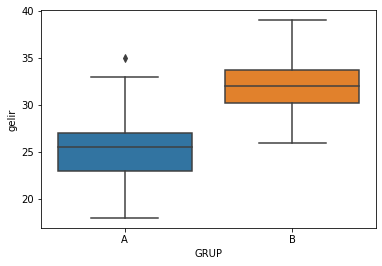

In [20]:
sns.boxplot(x = "GRUP",y = "gelir",data = AB);
#görselleştirme ile de bu farklılığın hangi tarafın lehine olduğu görülür.

Nonparametric Tek Örneklem T Testi

In [21]:
#varsayımlar sağlanmazsa
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)